# The Plan

## this workflow
Based on version 2 and 3 of this tree, I aim to make some improvements:
1. Reduce amount of species in the tree
2. Check species in the tree with literature on the 2ogd family
3. Replace guide sequences with Erbil's new set
4. Add more Azolla sequences to place in the tree
5. Plot RNAseq on the tree.

## data
In workflow 2, two 2OGD orthogroups from the oneKP project were found to be nearly identical.
The orthogroup based on AtLDOX was subsetted with the same list of species as the LAR tree also on [GitHub](www.github.com/lauralwd).
In the previous runs of this tree, I did not substantially reduce the input by filtering on species:

In [2]:
grep '>' -c data/orthogroup_AtLDOX_AT4g22880_selection-v*_guide-v*.fasta

data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta:4301
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta:4364
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta:4372
data/orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta:119


: 1

Instead I removed some very short sequences during trimming.
This is not my preferred method, so I want to be more stringent here from the onset.

In [3]:
grep '>' -c data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_*-iqtree-content.fasta

data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft_trim-gt4-seq95-res92_seqrm-iqtree-content.fasta:3927
data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft_trim-gt4-iqtree-content.fasta:4113


: 1

Now let's look at the species IDs that are in this set (taken from workflow v2)

In [5]:
wc -l data/1kP_ids_v1.txt
cat   data/1kP_ids_v1.txt

86 data/1kP_ids_v1.txt
>AALA04h
>ABSS
>AKXB
>ALVQ
>BMJR
>BNCU
>BSNI
>CAPN
>CBAE
>CQPW
>CVEG
>EEMJ
>ENQF
>EWXK
>GAON
>GJPF
>GNQG
>GOWD
>GTHK
>GXBM
>HPXA
>HVBQ
>JKHA
>JVBR
>JVSZ
>KBXS
>MEKP
>MUNP
>OSHQ
>PBUU
>PIVW
>PNZO
>POOW
>PQED
>PQTO
>QVMR
>RCBT
>RSOF
>SGTW
>TCBC
>TFYI
>THEW
>TOXE
>UGNK
>UHLI
>UKUC
>UPMJ
>UUHD
>VDAO
>VIBO
>VITX
>WBOD
>WLIC
>WZFE
>XZUY
>YJJY
>YWNF
>ZFGK
>ZFRE
>ZXJO
>ZZOL
>Ambtr
>Aquco
>Arath
>Betvu
>Carpa
>Chlre
>Chlva
>Elagu
>Klefl
>Manes
>Micpu
>Mimgu
>Musac
>Nelnu
>Orysa
>Phavu
>Pinta
>Poptr
>Prupe
>Selmo
>Solly
>Sorbi
>Spipo
>Theca
>Vitvi


: 1

In Kasai et al [DOI](https://doi.org/10.1111/tpj.12479), six plant genomes are studied for 2ogd gens:
1. *Arabidopsis thaliana* (present in dataset)
2. *Oryza sativa* (present in dataset)
3. *Picea abies* (**absent**, if I remember correctly, Pinus taeda behaved better in previous trees.)
4. *Selageniella moellendorfii* (present in dataset)
5. Physcomitrella patens (**absent**)
6. Chlamydomonas reinhartii (present in dataset)

Of these we miss only two. Picea is not present in my dataset but Physcomytrella is.
I'll add physcometrella (code Phypha)
Whether I'll go and hunt down all Picea sequences, I'll decide when I checked the RNAseq data for the presence of the different lineages.

In [1]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | head
grep -i Picea data/orthogroup_ANS-LDOX.fasta | head

>Phypa_v3_0-Phpat_006G019800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_005G086800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_013G033700_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_026G051300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_009G093300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_017G023600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_003G127600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G044200_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G017400_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_027G021000_1-Physcomitrella_patens_VvANS-like
grep: write error: Broken pipe
>AWQB-2009263-Picea_engelmanii_VvANS-like
>AWQB-2001692-Picea_engelmanii_VvANS-like
>AWQB-2002242-Picea_engelmanii_VvANS-like
>AWQB-2010257-Picea_engelmanii_VvANS-like
>AWQB-2002243-Picea_engelmanii_VvANS-like
>AWQB-2047197-Picea_engelmanii_VvANS-like
>AWQB-2052945-Picea_engelmanii_VvANS-like
>AWQB-2009200-Picea_engelmanii_VvAN

: 1

In [2]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c
grep -i Picea data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c

    100 >Phyp
     33 >AWQB04l
      1 NGVTG
     47 >AWQB
      1 NGVTG
      6 >AWQB


: 1

## Previous trees

Selection 1 guide 1 contained too few guide sequences, hence the first real result is selelection-v1_guide-v2.
This tree contains some characterised (guide) sequences for most clades, but not all.
A "rootable clade" can be identified with the vast majority of algal sequences, but this contains seed plant sequences as well.
This particular clade is consistent in all trees made.
Guide v3 is an update on guide v2. 
This itteration again is an update on guide v3, now moving to guide v4.

In addition, I'm moving to selection v2 based on code/text above.


# 1. Composing your fasta

In [3]:
ls data

1kp-IDs_to_clade_to_colour.tab
1kP_ids_v1.txt
1kP_ids_v2.txt
1kP_LAR_selectionv1_guide_v5.fasta
alignments_raw
alignments_trimmed
ANS-likes_Azolla-filiculoides.fasta
ANS-likes_Azolla-filiculoides_v2.fasta
ANS-likes_Azolla-filiculoides_v2_linear.fasta
ANS-likes_Azolla-filiculoides_v3.fasta
ANS-likes_Azolla-filiculoides_v3_linear.fasta
guide-sequences-v1.fasta
guide-sequences-v1_linear.fasta
guide-sequences-v2.fasta
guide-sequences-v2_linear.fasta
guide-sequences-v3.fasta
guide-sequences-v3_linear.fasta
orthogroup_ANS-LDOX.fasta
orthogroup_AtLDOX_AT4g22880.fasta
orthogroup_AtLDOX_AT4g22880_linear.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v2.fasta
orthogroup_VvANS.fasta
_selection-v2.fasta
Sorghum-subset-LDO

: 1

# 1. Composing your fasta

Let's look at what we have

In [2]:
tree

.
├── 2OGD_tree_v4.ipynb
├── analyses
│   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_fasttrees
│   │   └── aligned-mafft_trim-gt4-seq95-res90
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.bionj
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.ckp.gz
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.iqtree
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.log
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.mldist
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stderr
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stdout
│   │      

│   ├── alignments_raw
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.log
│   │   └── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.log
│   ├── alignments_trimmed
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq90-res90.fasta
│   │   ├── o

: 1

Store the sequences you want to make a tree of in the data directory and make the inseq variable the name of your input fasta without the extention:

In [1]:
inseq=orthogroup_AtLDOX_AT4g22880

: 1

In [12]:
while read line
do   count=$(grep "$line" -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v1.txt 
echo 'Phypa' && grep '>Phypa' -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta

>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CQPW	42
>CVEG	26
>EEMJ	28
>ENQF	54
>EWXK	53
>GAON	54
>GJPF	47
>GNQG	48
>GOWD	25
>GTHK	37
>GXBM	3
>HPXA	50
>HVBQ	70
>JKHA	5
>JVBR	43
>JVSZ	31
>KBXS	40
>MEKP	55
>MUNP	29
>OSHQ	42
>PBUU	32
>PIVW	29
>PNZO	40
>POOW	7
>PQED	8
>PQTO	54
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>THEW	19
>TOXE	29
>UGNK	56
>UHLI	33
>UKUC	9
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>VITX	39
>WBOD	60
>WLIC	39
>WZFE	41
>XZUY	32
>YJJY	30
>YWNF	31
>ZFGK	43
>ZFRE	46
>ZXJO	31
>ZZOL	35
>Ambtr	91
>Aquco	92
>Arath	87
>Betvu	96
>Carpa	63
>Chlre	2
>Chlva	5
>Elagu	45
>Klefl	4
>Manes	128
>Micpu	9
>Mimgu	86
>Musac	86
>Nelnu	79
>Orysa	86
>Phavu	106
>Pinta	164
>Poptr	131
>Prupe	118
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
Phypa04h
50


: 1

Based on the list above, I made a pivot table to see how these specied identifiers spread over the different clades of land plants.
Since the original input of 4000+ (without Azfi or guide seqs) is too big, I want to be more stringent on input.
Simultaneously, this is just huuuge gene family, so the tree is going to be huge anyway.

The sheet is available online here: https://docs.google.com/spreadsheets/d/1v2igxY_nr7ETMoUdbqpY0QKVxJ-KYiRiO2lLoyOABsw/edit?usp=sharing

The summary looks like this:
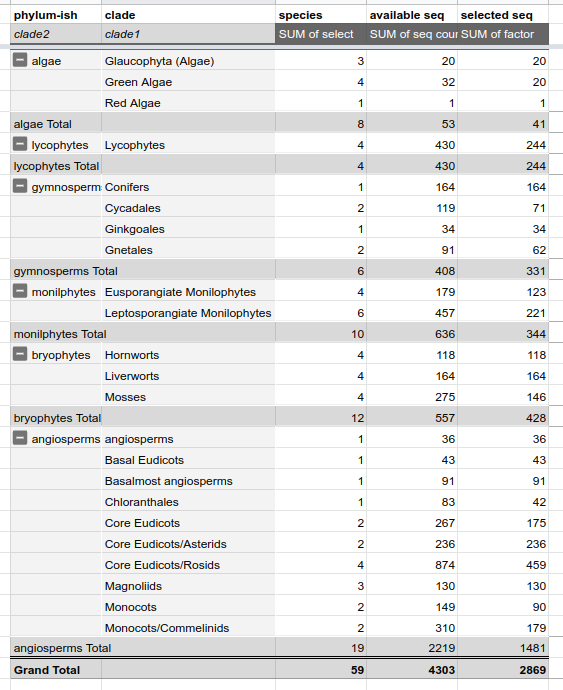

In short, by removing some species from all major clades (but especially angiosperms) I moved from 4303 sequences to 2869 while keeping a reasonable spread over plant phyla.

In selecting I prioritised keeping DNA samples in, and having at least one representative species per clade (clade1).

In total, 59h species are in this reference set.

## 1.2 systematic subsetting.


based on the sheet linked above, I made a new file 1kp_ids_v2.txt.
This file contains all RNA and DNA identifiers from that sheet.

In [27]:
wc -l data/1kP_ids_v2.txt

59 data/1kP_ids_v2.txt


: 1

In [28]:
grep -i -f ./data/1kP_ids_v2.txt data/"$inseq"_linear.fasta -A 1 --no-group-separator > data/"$inseq"_selection-v2.fasta

: 1

In [29]:
grep '>'  data/"$inseq"_selection-v2.fasta -c
wc -l     data/"$inseq"_selection-v2.fasta

2869004l
5738 data/orthogroup_AtLDOX_AT4g22880_selection-v2.fasta


: 1

Now check if all species IDs are present:

In [30]:
while read line
do   count=$(grep "$line" -c  data/"$inseq"_selection-v2.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v2.txt 


>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CVEG	26
>ENQF	54
>GJPF	47
>GOWD	25
>GTHK	37
>HPXA	50
>JKHA	5
>JVBR	43
>JVSZ	31
>MEKP	55
>MUNP	29
>OSHQ	42
>PIVW	29
>POOW	7
>PQED	8
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>UHLI	33
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>WBOD	60
>WLIC	39
>XZUY	32
>ZFRE	46
>ZXJO	31
>Ambtr	91
>Arath	87
>Betvu	96
>Chlre	2
>Chlva	5
>Klefl	4
>Micpu	9
>Mimgu	86
>Nelnu	79
>Orysa	86
>Pinta	164
>Poptr	131
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
>Phypa	50


: 1

### concluding
Great, we have a succesfully reduced the input by 1500-ish sequences and double checked that all species IDs came across as intended. Now move on the adding guide and Azolla sequences.

## 1.3 add guide sequences

I'm wondering if the 2OGD clade diversified in land plants specifically, or if it diversified before. 
Hence, I'm adding sequences of the non-plant models: human and S.cerevisiae.
Ideally I'll present the tree rooted (required for plotting the RNAseq data), so a propperly determined root would be nice!

I'm getting these sequences from uniprot:

[Human sequences](https://www.uniprot.org/uniprot/?query=taxonomy:%22Eumetazoa%20[6072]%22%20(oxoglutarate%20dehydrogenase)&fil=organism%3A%22Homo+sapiens+%28Human%29+%5B9606%5D%22+AND+reviewed%3Ayes)

[Yeast sequences](https://www.uniprot.org/uniprot/?query=taxonomy:%22Ascomycota%20[4890]%22%20(oxoglutarate%20dehydrogenase)&fil=organism%3A%22Saccharomyces+cerevisiae+%28strain+ATCC+204508+%2F+S288c%29+%28Baker%27s+yeast%29+%5B559292%5D%22+AND+reviewed%3Ayes)

and storing them as `data/ogd_human.fasta`  and `data/ogd_s-cerevisiae.fasta`

shortened names with: regex ` OS=.*`

Then linearise them like all sequences:

In [32]:
cat data/ogd_human.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/ogd_human_linear.fasta
mv data/ogd_human_linear.fasta data/ogd_human.fasta

: 1

In [33]:
cat data/ogd_s-cerevisiae.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/ogd_s-cerevisiae_linear.fasta
mv data/ogd_s-cerevisiae_linear.fasta data/ogd_s-cerevisiae.fasta

: 1

### now actually working on the guide sequences:
linearise:

In [34]:
cat data/guide-sequences-v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/guide-sequences-v4_linear.fasta

: 1

And the Azolla filiculoides sequences:

In [35]:
cat data/ANS-likes_Azolla-filiculoides_v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/ANS-likes_Azolla-filiculoides_v4_linear.fasta

: 1

now combine

1. outgroup yeast
2. outgroup human
3. Azfi sequences
4. guide sequences
5. orthogroup

In [36]:
cat data/ogd_s-cerevisiae.fasta                        \
    data/ogd_human.fasta                               \
    data/ANS-likes_Azolla-filiculoides_v4_linear.fasta \
    data/guide-sequences-v4_linear.fasta               \
    data/"$inseq"_selection-v2.fasta                   \
> data/"$inseq"_selection-v2_guide-v4.fasta

: 1

In [38]:
head data/"$inseq"_selection-v2_guide-v4.fasta
tail data/"$inseq"_selection-v2_guide-v4.fasta

>sp|P40510|SER33_YEAST D-3-phosphoglycerate dehydrogenase 2
MSYSAADNLQDSFQRAMNFSGSPGAVSTSPTQSFMNTLPRRVSITKQPKALKPFSTGDMNILLLENVNATAIKIFKDQGYQVEFHKSSLPEDELIEKIKDVHAIGIRSKTRLTEKILQHARNLVCIGCFCIGTNQVDLKYAASKGIAVFNSPFSNSRSVAELVIGEIISLARQLGDRSIELHTGTWNKVAARCWEVRGKTLGIIGYGHIGSQLSVLAEAMGLHVLYYDIVTIMALGTARQVSTLDELLNKSDFVTLHVPATPETEKMLSAPQFAAMKDGAYVINASRGTVVDIPSLIQAVKANKIAGAALDVYPHEPAKNGEGSFNDELNSWTSELVSLPNIILTPHIGGSTEEAQSSIGIEVATALSKYINEGNSVGSVNFPEVSLKSLDYDQENTVRVLYIHRNVPGVLKTVNDILSDHNIEKQFSDSHGEIAYLMADISSVNQSEIKDIYEKLNQTSAKVSIRLLY
>sp|P40054|SERA_YEAST D-3-phosphoglycerate dehydrogenase 1
MTSIDINNLQNTFQQAMNMSGSPGAVCTSPTQSFMNTVPQRLNAVKHPKILKPFSTGDMKILLLENVNQTAITIFEEQGYQVEFYKSSLPEEELIEKIKDVHAIGIRSKTRLTSNVLQHAKNLVCIGCFCIGTNQVDLDYATSRGIAVFNSPFSNSRSVAELVIAEIISLARQLGDRSIELHTGTWNKVAARCWEVRGKTLGIIGYGHIGSQLSVLAEAMGLHVLYYDIVTIMALGTARQVSTLDELLNKSDFVTLHVPATPETEKMLSAPQFAAMKDGAYVINASRGTVVDIPSLIQAVKANKIAGAALDVYPHEPAKNGEGSFNDELNSWTSELVSLPNIILTPHIGGSTEEAQSSIGIEVATALSKYINEGNSVGSVNFPEVALKSLSYDQENTVRVLYIHQNVPGVL

: 1

In [39]:
grep '>' -c data/"$inseq"_selection-v2_guide-v4.fasta

3110004l


: 1

And reset variable, and check.

In [40]:
# for the selection workflow
inseq="$inseq"_selection-v2_guide-v4
echo $inseq

orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4


: 1

In [41]:
head data/$inseq.fasta

>sp|P40510|SER33_YEAST D-3-phosphoglycerate dehydrogenase 2
MSYSAADNLQDSFQRAMNFSGSPGAVSTSPTQSFMNTLPRRVSITKQPKALKPFSTGDMNILLLENVNATAIKIFKDQGYQVEFHKSSLPEDELIEKIKDVHAIGIRSKTRLTEKILQHARNLVCIGCFCIGTNQVDLKYAASKGIAVFNSPFSNSRSVAELVIGEIISLARQLGDRSIELHTGTWNKVAARCWEVRGKTLGIIGYGHIGSQLSVLAEAMGLHVLYYDIVTIMALGTARQVSTLDELLNKSDFVTLHVPATPETEKMLSAPQFAAMKDGAYVINASRGTVVDIPSLIQAVKANKIAGAALDVYPHEPAKNGEGSFNDELNSWTSELVSLPNIILTPHIGGSTEEAQSSIGIEVATALSKYINEGNSVGSVNFPEVSLKSLDYDQENTVRVLYIHRNVPGVLKTVNDILSDHNIEKQFSDSHGEIAYLMADISSVNQSEIKDIYEKLNQTSAKVSIRLLY
>sp|P40054|SERA_YEAST D-3-phosphoglycerate dehydrogenase 1
MTSIDINNLQNTFQQAMNMSGSPGAVCTSPTQSFMNTVPQRLNAVKHPKILKPFSTGDMKILLLENVNQTAITIFEEQGYQVEFYKSSLPEEELIEKIKDVHAIGIRSKTRLTSNVLQHAKNLVCIGCFCIGTNQVDLDYATSRGIAVFNSPFSNSRSVAELVIAEIISLARQLGDRSIELHTGTWNKVAARCWEVRGKTLGIIGYGHIGSQLSVLAEAMGLHVLYYDIVTIMALGTARQVSTLDELLNKSDFVTLHVPATPETEKMLSAPQFAAMKDGAYVINASRGTVVDIPSLIQAVKANKIAGAALDVYPHEPAKNGEGSFNDELNSWTSELVSLPNIILTPHIGGSTEEAQSSIGIEVATALSKYINEGNSVGSVNFPEVALKSLSYDQENTVRVLYIHQNVPGVL

: 1

# 2. Aligning

mafft

Linsi is probably the most acurate mafft setting (as declared by the MAFFT authors). It is turned off by default in normal or auto mafft for alignments bigger than 200 sequences. Typically, it only takes a couple of minutes so I don't mind the wait. Building a tree takes a lot longer so these extra minutes are a sensible investment to me.

In [4]:
inseq=orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4

: 1

In [5]:
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
if    [ ! -f "./data/alignments_raw/$inseq"_aligned-mafft.fasta ]
then  mafft --auto --thread $(nproc) data/$inseq.fasta \
              >  ./data/alignments_raw/"$inseq"_aligned-mafft.fasta \
              2> ./data/alignments_raw/"$inseq"_aligned-mafft.log
fi

: 1

In [ ]:
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
prefix=data/alignments_raw/"$inseq"_aligned-mafft-einsi
if    [ ! -f "$prefix".fasta ]
then  linsi --thread $(nproc) data/$inseq.fasta \
            >  "$prefix".fasta \
            2> "$prefix".log
fi

Adding an einsi allignment as well since this is a many domain protein and linsi expects one conserved tomain .

In [ ]:
#rm "./data/alignments_raw/$inseq"_aligned-mafft.*
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
prefix=data/alignments_raw/"$inseq"_aligned-mafft-linsi
if    [ ! -f "$prefix".fasta ]
then  einsi --thread $(nproc) data/$inseq.fasta \
            >  "$prefix".fasta \
            2> "$prefix".log
fi

In [5]:
tail ./data/alignments_raw/"$inseq"_aligned-*.log

==> ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-einsi.log <==
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

 3100 / 3110
Segment   1/  1    1-13530
002-5746-0 (thread    8) worse         
==> ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi.log <==
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pairwise alignment information

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.


==> ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft.log <==
 FFT-NS-2 (Fast but rough)
 Progressive 

: 1

In [6]:
ls ./data/alignments_raw/$inseq* -sh

5,0M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-auto_seq-content-above-2pc.png
   0 ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-einsi.fasta
788K ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-einsi.log
 32M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft.fasta
   0 ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2.png
 16M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_seq-content-above-2pc.png
 28M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi.fasta
3,1M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi.log
 48K ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft.log


: 1

In [ ]:
head ./data/alignments_raw/"$inseq"_aligned-mafft*.fasta

## snapshots of alignment
Done manually with a quick trim.

In [1]:


#for   i in data/alignments_raw/*.fasta
#do    prefix=$(echo $i | sed 's/\.fasta//')
#      if    [ ! -f $prefix.png ]
#      then  jalview -nodisplay          \
#                    -open $prefix.fasta \
#                    -colour CLUSTAL     \
#                    -png $prefix.png    \
#            >  /dev/null                \
#            2> /dev/null &
#      fi
#done
#wait

[1] 21194[?2004l
[2] 21200
[3] 21205
[4] 21212
[5] 21225
[6] 21245
[1]   Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null
[4]   Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null
[5]-  Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null
[6]+  Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null
[2]-  Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null
[3]+  Done                    jalview -nodisplay -open $prefix.fasta -colour CLUSTAL -png $prefix.png > /dev/null 2> /dev/null


: 1

### auto (trimmed at 2percent
![](./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_seq-content-above-2pc.png)

### linsi (trimmed at 1percent)
![](./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-auto_seq-content-above-2pc.png)

# 3. Alignment trimming

Odds are, your alignment is quite gappy which may confuse tree building algorithms. Often it is better to remove gappy columns in your alignment. Let's have a look at this with `trimAl`. Short for 'trim alignment' (I guess). No Artificial intelegence stuff going on here.

As always, have a look at the help page.

## 3.1 automated trimming
Now let's go with the automated algorith of `trimAl` first and inspect the results.

I'm running this in a loop that will process all your alignments of the last step simultaneously. Try not to create too many.

You can evaluate the trimming in the webpage that trimal made. Browse in the jupyter file browser to: 

> data/alignments_trimmed/...trim-auto.html'

the webpage should open in your browser and you can check how many sequences and collumns have been retained, and see exactly which ones. If you are contect, proceed to tree building!

### 3.2 Tweak trimming parameters

Alternatively, you may tweak your own trimming parameters like so. 

Everytime I change parameters, I change the variable `$trimappendix` to reflect those changes. Second, I explain briefly in a text cell why I chose to do so.

In [3]:
trimal -h


trimAl v1.4.rev15 build[2013-12-17]. 2009-2013. Salvador Capella-Gutierrez and Toni Gabaldón.

trimAl webpage: http://trimal.cgenomics.org

This program is free software: you can redistribute it and/or modify 
it under the terms of the GNU General Public License as published by 
the Free Software Foundation, the last available version.

Please cite:
		trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses.
		Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon.
		Bioinformatics 2009, 25:1972-1973.

Basic usage
	trimal -in <inputfile> -out <outputfile> -(other options).

Common options (for a complete list please see the User Guide or visit http://trimal.cgenomics.org):

    -h                       Print this information and show some examples.
    --version                Print the trimAl version.

    -in <inputfile>          Input file in several formats (clustal, fasta, NBRF/PIR, nexus, phylip3.2, phylip).

    -compareset <inputfile>  In


9) Selection of sequences to be deleted from the alignment. Start in 0

   trimal -in <inputfile> -out <outputfile> -selectseqs { 2,4,8-12 } 

10) Select the 5 most representative sequences from the alignment

   trimal -in <inputfile> -out <outputfile> -clusters 5 



: 1

In [12]:
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi
# define appendix only once here:
trimappendix='trim-gt05-seq90-res98'


for a in "data/alignments_raw/$inseq"_aligned*linsi*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .05 \
                 -seqoverlap 90 \
                 -resoverlap 0.98  &
    fi
done

trimming alignment data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi.fasta?2004l
[3] 241202


: 1

In [8]:
ls data/alignments_trimmed/$inseq* -sh

1,6M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05.fasta
 39M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05.png
1,6M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq30-res50.fasta
 42M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq30-res50.png
1,6M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq40-res50.fasta
 42M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq40-res50.png
1,6M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq50-res50.fasta
 42M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-mafft-linsi2_trim-gt05-seq50-res50.png
1,6M dat

: 1

In [14]:
grep -c '>' data/alignments_trimmed/$inseq*.fasta | sed 's;data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v4_aligned-;;g'

mafft-linsi2_trim-gt05.fasta:3110
mafft-linsi2_trim-gt05-seq30-res50.fasta:3110
mafft-linsi2_trim-gt05-seq40-res50.fasta:3110
mafft-linsi2_trim-gt05-seq50-res50.fasta:3110
mafft-linsi2_trim-gt05-seq90-res90.fasta:3110
mafft-linsi2_trim-gt05-seq90-res91.fasta:3102
mafft-linsi2_trim-gt05-seq90-res92.fasta:3102
mafft-linsi2_trim-gt05-seq90-res93.fasta:3102
mafft-linsi2_trim-gt05-seq90-res94.fasta:3102
mafft-linsi2_trim-gt05-seq90-res95.fasta:3101
mafft-linsi2_trim-gt1.fasta:3110
mafft_trim-gt05.fasta:3110
mafft_trim-gt1.fasta:3110


: 1

In [3]:
for   i in data/alignments_trimmed/*.fasta
do    prefix=$(echo $i | sed 's/\.fasta//')
      if    [ ! -f $prefix.png ]
      then  jalview -nodisplay \
                    -open $prefix.fasta \
                    -colour CLUSTAL \
                    -png  $prefix.png > /dev/null 2> /dev/null 
      fi
done
wait

: 1

In [97]:
ls data/alignments_trimmed/*.png -sh

40M data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.png


## Allignment conclusions

### Allignment algorithm
The mafft auto alligments are not very good in finding the conserved domains between both the human/yeast outgroups versus the plants.
Hence I'm sticking with the linsi allignments for now.
Also, I think I see at least two domains here, so I'm adding an **einsi allignment** too as an afterthought.

The linsi allignment also has fewer collumns, hinting that big gaps may be better alligned.

Looking at the content/structure in the gaps, I'm quite confident there is some information/signal to gain here, especially after `prank` indel-reallignment.

### mafft auto with gt 05:
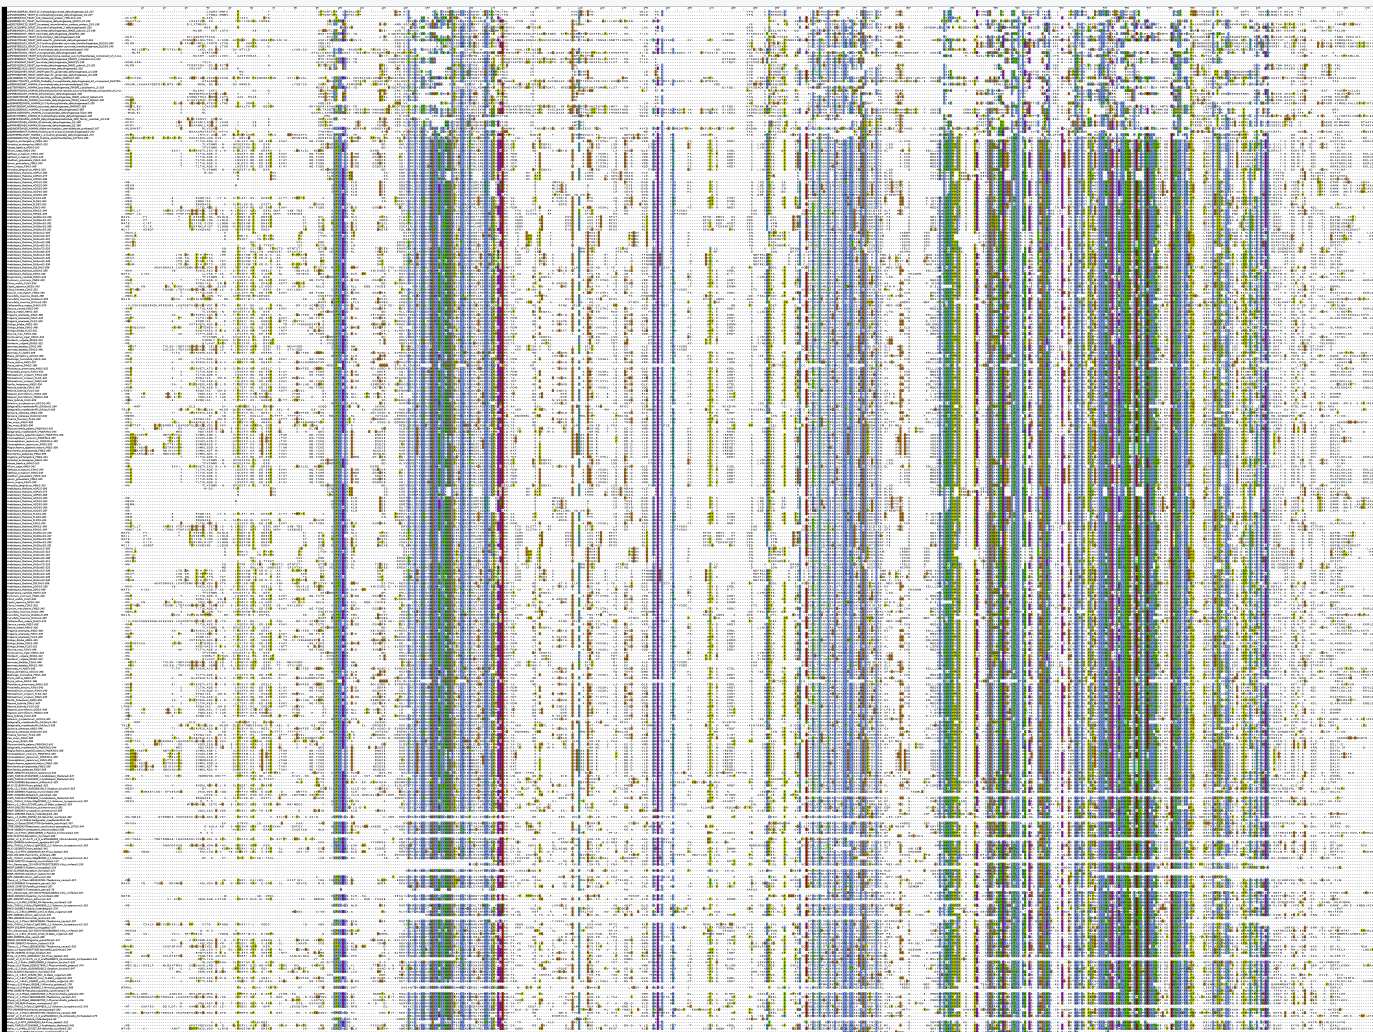

### mafft linsi with gt 05:
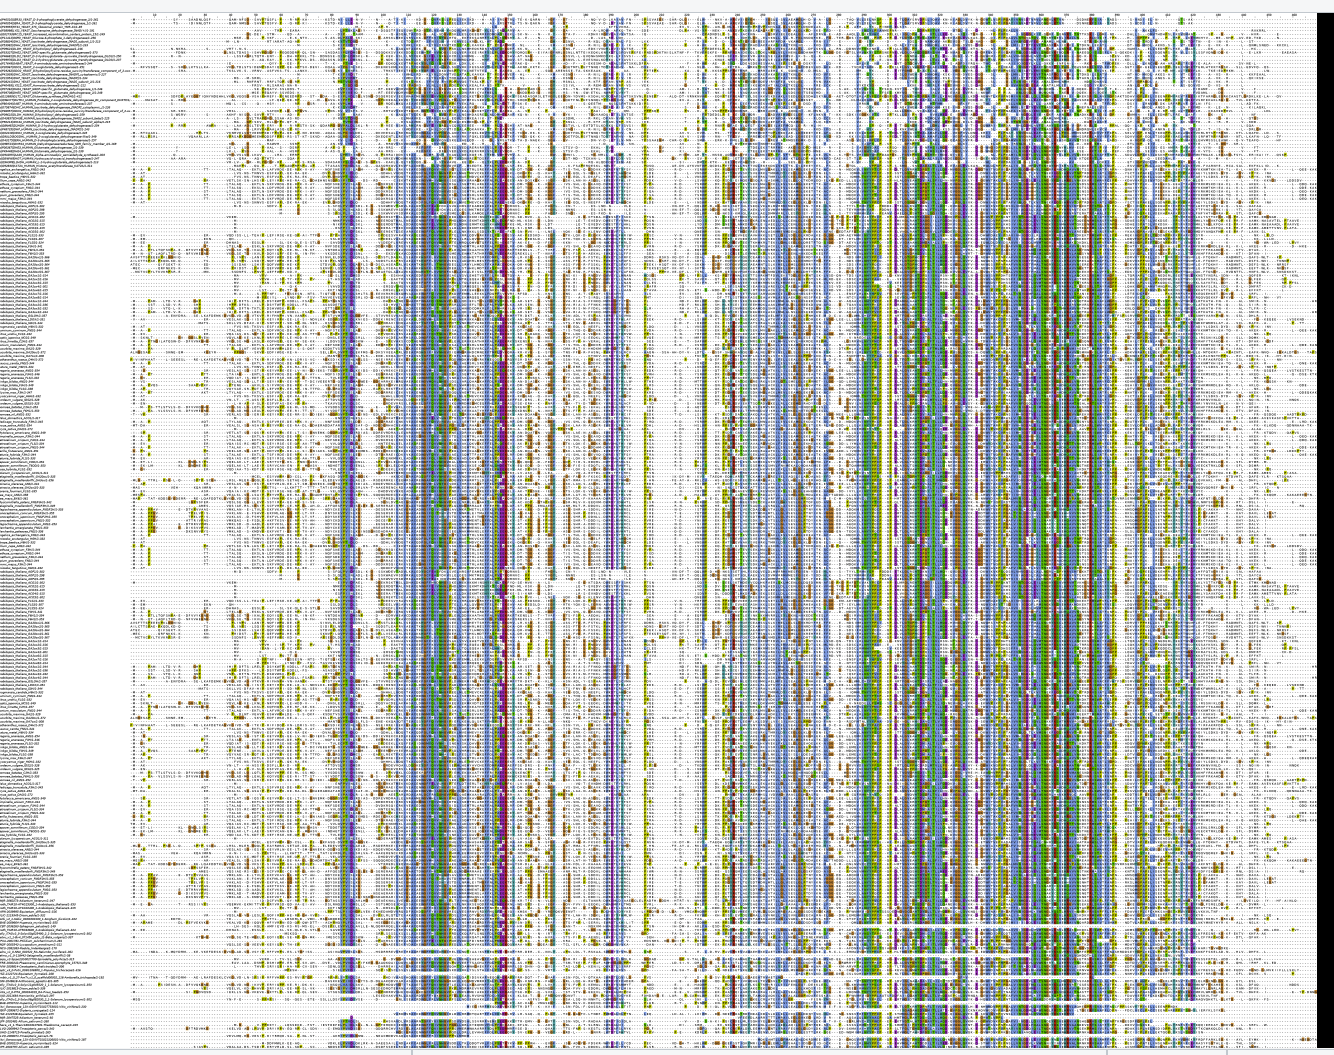

### gap threshold

### seq removal


In [ ]:
head data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta 

# 4. Fast tree building
Here we'll make fast trees: not acurate, no bootstraps, but fast. This gives us an idea of the output and how we will process it. Building 'propper' trees can take days sometimes weeks, so it's better to be sure you have all sequences in there you want before you start. 

I use two ways to make thise fast trees, first with a program called `fasttree` and second with the programm `iqtree` with the `-fast` parameter. My gut feeling is that the latter is a bit more acurate but takes a couple of minutes. Fasttree takes seconds.

I arbitrarily consider trees to be analyses and not data, hence I store these in the `analyses` directory.

Since these trees run fast (just take a second to consider how rediculous that sounds) I propose to run these in loops again, taking all the trimmed alignments that were made earlier. The trees run in parallel on one CPU. If you're running many trees (way more than you have computing cores) then don't run these in the background. Practically, that means removing the `&` character almost at the end of the loop.

## 4.2 IQtree -fast

And here is the same but for running iqtree. I picked some random model here, but substitute it by anything you like better or have good experience with it the past.

In [ ]:
#for a in data/alignments_trimmed/"$inseq"_aligned*.fasta
conda activate phylogenetics
for a in data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta
do  echo "making a iqtree fast tree of file $a"
    appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    echo $appendix
    if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
    then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
    fi
    
    iqprefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_iqtree-fast
    if   [ ! -f "$iqprefix".iqtree ]
    then nice iqtree -s $a -fast \
                     -m 'LG+R7' \
                     -pre "$iqprefix" \
                     > "$iqprefix".stdout \
                     2> "$iqprefix".stderr &
    fi
done
wait
conda deactivate

(phylogenetics) making a iqtree fast tree of file data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta
aligned-mafft_trim-gt4-seq95-res90
[1] 584995
(phylogenetics) 

## 4.3 Visualise your fast trees. 

To visualise your trees, you perhaps already have something installed like mega, seaview, etc. Otherwise you can upload the tree file to [iToL](https://itol.embl.de/) (my prefered method) or any other website that visualises trees. See section 6 for uploading your trees to iToL.

Alternativelly, we can try to get a quick snapshot here in the notebook:

### conclusions

A first fast-tree shows us plenty of interesting stuff already:
ANS and FLS cluster together, and distincly from F3H. 
There's however, a bunch of other clear groups that remain uncharacterised. 
To remidy this, Erbil has provided a new set of guide sequences to better illustratie the evolution of this big family of genes. 
I'm leaving the UFBootstrap run on for now, to confirm the fasttree results, but then I'll move on to a version with guide-2. 
The iq-fast-tree is online [here](https://itol.embl.de/tree/9421021579222211612506891) and looks like  this:

![](analyses/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_fasttrees/aligned-mafft_trim-gt4-seq95-res90/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.svg)

# 5. Building trees with IQtree 

Finally, we're at the stage to build propper maximum likelyhood phylogenetic trees! Based on your previous results, you should have one or two trimmed alignments you want to make a tree of. There is several choices to make still: a model of evolution and a bootstrapping method.

**modelfinder**

IQtree is a state-of-the art tree buildling program, which has a model finder algorithm included! This can take a couple of hours, so be sure to do this only once. There is two model finder options, a quick one with some often used models: `-m TEST` or an extended modelfinder, using more models of evolution and substitution: `-m MFP`. I recommend the latter. Once you have your best-fit model (for example: 'LG+R7') then use this model when you build more trees from the same alignment: `-m 'LG+R7'`

**bootstrapping**

Normal or 'non-parametric' bootstrapping can take quite a long time; I have had trees running for weeks. Hence there is alternatives that are a lot faster but might over or underestimate the bootstrap values if your alignment doesn't fit your model well. To use 'normal bootstraps' the minimum is 100. That's why I like to to 200 to be safe, by adding the option `-b 200`.

Alternativelly, there is the 'ultrafast bootstrap' option in IQtree. The minumum for this is 1000 bootstraps, so I'd like to do double by including the parameter: `-bb 2000`. Additionally, I highly recommend also running the approximate likelyhood ratio test for 2000 bootstraps at the same time by including parameters `-alrt 2000`. This adds a minimal amount of run time and makes interpretation of your tree a lot more reliable.

As the [IQtree FAQ](http://www.iqtree.org/doc/Frequently-Asked-Questions#how-do-i-interpret-ultrafast-bootstrap-ufboot-support-values) says: typically you start believing a clade when the ultra fast bootstraps => 95 and alrt => 80. Interpretation of these values is not linear like 'normal' bootstrap, hence if you lower the threshold of ultrafast bootstraps to 90, you will likely enormously overestimate your results. 

**other command-line options**

In the commandline I wrote below, I instruct iqtree to use no more CPU cores than your computer has, but also to find the optimum amount of cores (more is not always better). Second, a prefix is defined to store the different trees that IQtree wil make.

**More info**
* iqtree tutorial: http://www.iqtree.org/doc/Tutorial
* aLRT: https://www.ncbi.nlm.nih.gov/pubmed/16785212





## running IQtree

Now these are all trimmed alignments you have available. 
Choose one to start with (based on your fasttrees or inspections of your alignments).

Make sure that 
1. the path to this alignment is the variable `$a` 
2. you choose an appendix based on your iqtree settings

In [ ]:
ls data/alignments_trimmed/"$inseq"_aligned*fasta

In [ ]:
a=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta

#iqpendix='iqtree-b200'
iqpendix='iqtree-bb2000-alrt2000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f "$iqprefix".tree ]
then nice iqtree -s $a \
                 -m MFP \
                 -bb 2000 \
                 -alrt 2000 \
                 -nt AUTO \
                 -ntmax $(nproc)  \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout \
                 && cat "$iqprefix".out | mail -s ANS_IQtree_run laura.w.dijkhuizen@gmail.com
fi

In [ ]:
ls $iqprefix* -1

You can have a look at the last lines of your log file like this:

In [ ]:
tail -n 40 $iqprefix.log

Are you content with your tree? Great news! If you want to do another run, I recommend copying the cell above and editing the copy. That way you keep the code for all trees you made. Don't forget to explain what you observed, why you're making a new tree, and what you're changing (remember this is your labjournal). 

# tree storage

For tree storage and sharing, I have yet to encounter a better tool than EMBLs [iToL](https://itol.embl.de/). It's a great interface for exploring and sharing trees with colleagues. You can browse to the treefile IQtree created on your computer and upload it to iToL. Alternativelly, you can copy paste the contents of the file to iToL. Make sure to keep the original filename as well! This file name now contains a brief summary of how this tree was made.

## conclusion
preliminary: A tree like this, although it takes a while to calculate, succedes in categorising Azolla ANS-like sequences into specific groups of this big DOX gene family. 
However, propper labels for certain groups are still missing, to addres this I'll implement Erbils second version of the ANS guide sequences. Additionally, I may find some zea mays, arabidopsis sequences in the different groups.

There's distinct clades, often with members of all big plant groups, but the speciation pattern isn't always nice. To conclude about the evolution of any one clade internally, a separate tree of only that clade should be made with dedicated re-alignment and tree inference.